## 데이터 로드

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

# ====== 데이터 로드 ======
train_candidates = [
    Path("/home/tjdals/KDT_Project/icu/code/dat/29757_train_merged.csv"),
]
test_candidates = [
    Path("/home/tjdals/KDT_Project/icu/code/dat/29757_test_merged.csv"),
]

def resolve_path(candidates: list[Path]) -> Path:
    for p in candidates:
        if p.exists():
            return p
    raise FileNotFoundError(f"No dataset found in: {candidates}")

train_df = pd.read_csv(resolve_path(train_candidates))
test_df = pd.read_csv(resolve_path(test_candidates))

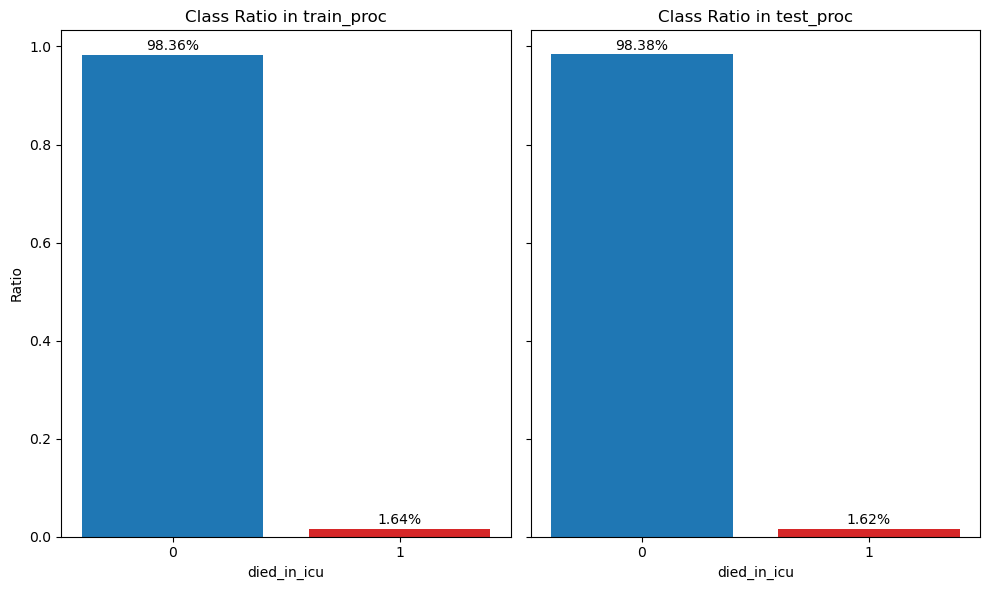

In [3]:
import matplotlib.pyplot as plt

target_col = "died_in_icu"

datasets = {
    "train_proc": train_df,
    "test_proc": test_df,
}

fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

for ax, (name, df) in zip(axes, datasets.items()):
    counts = df[target_col].value_counts().sort_index()
    ratios = counts / counts.sum()

    ax.bar(ratios.index.astype(str), ratios.values, color=["tab:blue", "tab:red"])
    ax.set_xlabel(target_col)
    ax.set_title(f"Class Ratio in {name}")

    for i, v in enumerate(ratios.values):
        ax.text(i, v + 0.01, f"{v:.2%}", ha="center")

axes[0].set_ylabel("Ratio")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

target_col = "died_in_icu"

datasets = {
    "train_proc": train_df,
    "test_proc": test_df,
}

fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

for ax, (name, df) in zip(axes, datasets.items()):
    counts = df[target_col].value_counts().sort_index()
    ratios = counts / counts.sum()

    ax.bar(ratios.index.astype(str), ratios.values, color=["tab:blue", "tab:red"])
    ax.set_xlabel(target_col)
    ax.set_title(f"Class Ratio in {name}")

    for i, v in enumerate(ratios.values):
        ax.text(i, v + 0.01, f"{v:.2%}", ha="center")

axes[0].set_ylabel("Ratio")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. 매핑 정보 정의
feature_mapping = {
    'feature1': 'Age', 'feature2': 'Sex', 'feature3': 'RespRate', 'feature4': 'HeartRate',
    'feature5': 'SysBP', 'feature6': 'DiasBP', 'feature7': 'Temp', 'feature8': 'O2Sat',
    'feature9': 'GCS_Motor', 'feature10': 'GCS_Verbal', 'feature11': 'GCS_Eye', 'feature12': 'FiO2',
    'feature13': 'ALT', 'feature14': 'Albumin', 'feature15': 'AST', 'feature16': 'ALP',
    'feature17': 'Bilirubin', 'feature18': 'BUN', 'feature19': 'Calcium', 'feature20': 'Chloride',
    'feature21': 'Creatinine', 'feature22': 'Glucose', 'feature23': 'Hgb', 'feature24': 'Hct',
    'feature25': 'Bicarbonate', 'feature26': 'pCO2', 'feature27': 'pO2', 'feature28': 'Platelets',
    'feature29': 'Potassium', 'feature30': 'TotalProtein', 'feature31': 'INR', 'feature32': 'RBC',
    'feature33': 'Sodium', 'feature34': 'WBC', 'feature35': 'delta_vital', 'feature36': 'delta_lab'
}

# 2. 데이터 로드 및 컬럼명 변경
df = df.rename(columns=feature_mapping)

# 3. ID 컬럼 제거 (존재하는 경우에만)
cols_to_drop = ['patientunitstayid', 'patient_id']
existing_cols = [c for c in cols_to_drop if c in df.columns]
df_clean = df.drop(columns=existing_cols)

print(f"Final Data Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")

# 이제 df_clean을 사용하여 분석/학습을 진행하시면 됩니다.

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

stats_df = df[numeric_cols].describe().T
stats_df = stats_df[['min', 'max', 'mean', '50%', 'std']]

print(stats_df.sort_values(by='max', ascending=False).head(10))

cols_to_plot = numeric_cols[:5]

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = train_df

null_info = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null Ratio (%)': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Null Ratio (%)', ascending=False)

high_nulls = null_info[null_info['Null Ratio (%)'] > 0]

print("=== Missing Value Top 10 ===")
print(high_nulls.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=high_nulls.index[:20], y=high_nulls['Null Ratio (%)'][:20], color='salmon') # 상위 20개만
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Columns with Missing Values')
plt.ylabel('Missing Ratio (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load Data
# Check for available files
file_path = "/content/drive/MyDrive/final_dataset/29757_test_merged.csv"
if not os.path.exists(file_path):
    # Fallback to check other potential names if the specific one isn't found
    files = [f for f in os.listdir('.') if f.endswith('.csv')]
    if files:
        file_path = files[0]

if os.path.exists(file_path):
    df = pd.read_csv(file_path)

    # 2. Rename Columns
    feature_mapping = {
        'feature1': 'Age', 'feature2': 'Sex', 'feature3': 'RespRate', 'feature4': 'HeartRate',
        'feature5': 'SysBP', 'feature6': 'DiasBP', 'feature7': 'Temp', 'feature8': 'O2Sat',
        'feature9': 'GCS_Motor', 'feature10': 'GCS_Verbal', 'feature11': 'GCS_Eye', 'feature12': 'FiO2',
        'feature13': 'ALT', 'feature14': 'Albumin', 'feature15': 'AST', 'feature16': 'ALP',
        'feature17': 'Bilirubin', 'feature18': 'BUN', 'feature19': 'Calcium', 'feature20': 'Chloride',
        'feature21': 'Creatinine', 'feature22': 'Glucose', 'feature23': 'Hgb', 'feature24': 'Hct',
        'feature25': 'Bicarbonate', 'feature26': 'pCO2', 'feature27': 'pO2', 'feature28': 'Platelets',
        'feature29': 'Potassium', 'feature30': 'TotalProtein', 'feature31': 'INR', 'feature32': 'RBC',
        'feature33': 'Sodium', 'feature34': 'WBC', 'feature35': 'delta_vital', 'feature36': 'delta_lab'
    }
    df = df.rename(columns=feature_mapping)

    # 3. Drop ID columns
    cols_to_drop = ['patientunitstayid', 'patient_id']
    df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

    # 4. Calculate Correlations
    target_col = 'died_in_icu'
    if target_col in df_clean.columns:
        # Correlation with target
        correlations = df_clean.corr()[target_col].drop(target_col)
        # Sort by absolute value
        top_correlations = correlations.abs().sort_values(ascending=False).head(15)

        # Get the actual correlation values (with sign) for the top abs correlated features
        top_corr_signed = correlations[top_correlations.index]

        print("Top 15 features correlated with died_in_icu:")
        print(top_corr_signed)

        # 5. Visualization
        plt.figure(figsize=(10, 8))

        # Bar chart for correlation with target
        colors = ['red' if x < 0 else 'blue' for x in top_corr_signed.values]
        top_corr_signed.sort_values().plot(kind='barh', color=colors)
        plt.title('Top 15 Features Correlated with died_in_icu')
        plt.xlabel('Correlation Coefficient')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('target_correlation_bar.png')

        # Heatmap for Top Features (inter-correlation)
        # Select top 10 features + target
        top_features = top_correlations.index[:10].tolist()
        heatmap_data = df_clean[top_features + [target_col]].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap of Top Features')
        plt.tight_layout()
        plt.savefig('feature_heatmap.png')

        plt.show()

    else:
        print("Target column 'died_in_icu' not found.")
else:
    print("Dataset not found.")

## 전처리 함수 설정

In [ ]:
# ====== 기본 설정 ======
target_col = "died_in_icu"
possible_group_cols = ["patientunitstayid", "patient_id"]
possible_time_cols = ["observationoffset"]

group_col = next((c for c in possible_group_cols if c in train_df.columns), None)
time_col = next((c for c in possible_time_cols if c in train_df.columns), None)
if group_col is None or time_col is None:
    raise ValueError("patient id or time column not found")

numeric_cols = train_df.select_dtypes(include=["number"]).columns
exclude = {target_col, "patient_id", "patientunitstayid", "observationoffset"}
base_cols = [c for c in numeric_cols if c not in exclude]

# ====== 함수 ======
def add_missing_and_time_features(df: pd.DataFrame, base_cols: list[str]) -> pd.DataFrame:
    df = df.sort_values([group_col, time_col]).copy()
    for col in base_cols:
        miss = df[col].isna().astype(int)
        last_time = df[time_col].where(df[col].notna()).groupby(df[group_col]).ffill()
        tsince = df[time_col] - last_time
        tsince = tsince.fillna(df[time_col])
        #df[f"{col}_miss"] = miss
        #df[f"{col}_tsince"] = tsince
    return df

def impute_base(df: pd.DataFrame, base_cols: list[str], medians: pd.Series) -> pd.DataFrame:
    df = df.sort_values([group_col, time_col]).copy()
    df[base_cols] = df.groupby(group_col, sort=False)[base_cols].ffill()
    df[base_cols] = df[base_cols].fillna(medians)
    return df

def sample_k_per_stay(df, group_col, time_col, k=10):
    df = df.sort_values([group_col, time_col]).copy()
    def pick_rows(g):
        n = len(g)
        if n <= k:
            return g
        idx = np.linspace(0, n - 1, k, dtype=int)
        return g.iloc[idx]
    return df.groupby(group_col, group_keys=False).apply(pick_rows)

def balance_ratio(df, target_col="died_in_icu", ratio_pos=0.08, random_state=42):
    pos = df[df[target_col] == 1]
    neg = df[df[target_col] == 0]
    desired_neg = int(len(pos) * (1 - ratio_pos) / ratio_pos)

    if desired_neg >= len(neg):
        desired_pos = int(len(neg) * ratio_pos / (1 - ratio_pos))
        pos = pos.sample(n=desired_pos, random_state=random_state)
    else:
        neg = neg.sample(n=desired_neg, random_state=random_state)

    return pd.concat([pos, neg]).sample(frac=1, random_state=random_state).reset_index(drop=True)

def sample_total_rows_by_group(df, group_col, n_total=1000, random_state=42):
    rng = np.random.default_rng(random_state)
    groups = {gid: g.index.to_numpy() for gid, g in df.groupby(group_col)}
    group_ids = list(groups.keys())
    rng.shuffle(group_ids)
    for gid in group_ids:
        rng.shuffle(groups[gid])

    picks = []
    while len(picks) < n_total and group_ids:
        next_group_ids = []
        for gid in group_ids:
            if len(picks) >= n_total:
                break
            idxs = groups[gid]
            if len(idxs) == 0:
                continue
            picks.append(idxs[0])
            groups[gid] = idxs[1:]
            if len(groups[gid]) > 0:
                next_group_ids.append(gid)
        group_ids = next_group_ids

    result = df.loc[picks].sample(frac=1, random_state=random_state).reset_index(drop=True)
    return result



## 최종 데이터셋 구성

In [5]:
feature_cols = base_cols 


train_proc = sample_total_rows_by_group(train_df, group_col, n_total=1000, random_state=42)
test_proc = sample_total_rows_by_group(test_df, group_col, n_total=1000, random_state=42)

train_proc = sample_k_per_stay(train_df, group_col, time_col, k=10)
test_proc = sample_k_per_stay(test_df, group_col, time_col, k=10)

# ====== 결측치 처리 ======

train_medians = train_proc[base_cols].median()
train_proc = impute_base(train_proc, base_cols, train_medians)
test_proc = impute_base(test_proc, base_cols, train_medians)

# ====== 클래스 비율 맞추기 (train만) ======
train_proc = balance_ratio(train_proc, target_col=target_col, ratio_pos=0.08)
test_proc = balance_ratio(test_proc, target_col=target_col, ratio_pos=0.08)

# ====== 데이터셋 구성 ======
X_train = train_proc[feature_cols]
y_train = train_proc[target_col]

X_test = test_proc[feature_cols]
y_test = test_proc[target_col]

/tmp/ipykernel_18899/713370553.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(pick_rows)
/tmp/ipykernel_18899/713370553.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(pick_rows)


## 모델 학습

In [7]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 클래스 불균형 비율 계산

scale_pos_weight = 92/8

models = {
    "LR": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000)),
    ]),
    "RF": RandomForestClassifier(
        n_estimators=1000,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced",
    ),
}

# XGBoost
try:
    import xgboost as xgb
    models["XGBoost"] = xgb.XGBClassifier(
        n_estimators=1000,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight,
    )
except Exception:
    pass

# LightGBM
try:
    import lightgbm as lgb
    models["LightGBM"] = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
        scale_pos_weight=scale_pos_weight,
    )
except Exception:
    pass


def aggregate_patient_scores(df: pd.DataFrame, scores: np.ndarray):
    tmp = df[[group_col, target_col]].copy()
    tmp["score"] = scores
    y_patient = tmp.groupby(group_col)[target_col].max()
    s_patient = tmp.groupby(group_col)["score"].mean()
    return y_patient, s_patient

pred_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)[:, 1]
    else:
        raw = model.decision_function(X_test)
        scores = 1 / (1 + np.exp(-raw))

    pred_scores[name] = scores

print("models used:", list(pred_scores.keys()))
print("test n:", len(y_test))


[LightGBM] [Info] Number of positive: 19006, number of negative: 218569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4346
[LightGBM] [Info] Number of data points in the train set: 237575, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080000 -> initscore=-2.442347
[LightGBM] [Info] Start training from score -2.442347
models used: ['LR', 'RF', 'XGBoost', 'LightGBM']
test n: 59412


## 성능평가

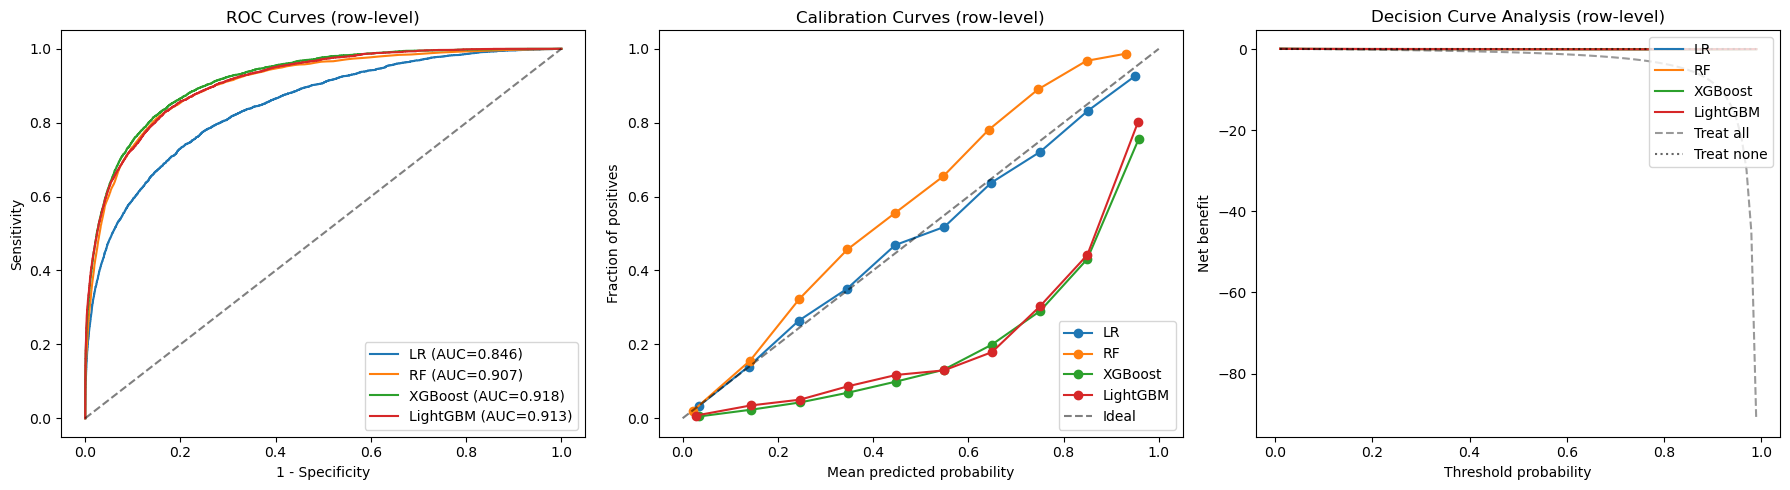

In [8]:
# 시각화: ROC + Calibration + Decision Curve (row-level)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) ROC
ax = axes[0]
for name, scores in pred_scores.items():
    fpr, tpr, _ = roc_curve(y_test, scores)
    auc = roc_auc_score(y_test, scores)
    ax.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
ax.plot([0, 1], [0, 1], "k--", alpha=0.5)
ax.set_xlabel("1 - Specificity")
ax.set_ylabel("Sensitivity")
ax.set_title("ROC Curves (row-level)")
ax.legend(loc="lower right")

# 2) Calibration
ax = axes[1]
for name, scores in pred_scores.items():
    prob_true, prob_pred = calibration_curve(y_test, scores, n_bins=10, strategy="uniform")
    ax.plot(prob_pred, prob_true, marker="o", label=name)
ax.plot([0, 1], [0, 1], "k--", alpha=0.5, label="Ideal")
ax.set_xlabel("Mean predicted probability")
ax.set_ylabel("Fraction of positives")
ax.set_title("Calibration Curves (row-level)")
ax.legend(loc="lower right")

# 3) Decision Curve
ax = axes[2]
thresholds = np.linspace(0.01, 0.99, 99)

def decision_curve(y_true, scores):
    n = len(y_true)
    net_benefit = []
    for t in thresholds:
        preds = scores >= t
        tp = ((preds == 1) & (y_true == 1)).sum()
        fp = ((preds == 1) & (y_true == 0)).sum()
        nb = (tp / n) - (fp / n) * (t / (1 - t))
        net_benefit.append(nb)
    return np.array(net_benefit)

for name, scores in pred_scores.items():
    nb = decision_curve(np.array(y_test), scores)
    ax.plot(thresholds, nb, label=name)

prevalence = np.mean(y_test)
nb_all = prevalence - (1 - prevalence) * (thresholds / (1 - thresholds))
ax.plot(thresholds, nb_all, "k--", alpha=0.4, label="Treat all")
ax.plot(thresholds, np.zeros_like(thresholds), "k:", alpha=0.6, label="Treat none")

ax.set_xlabel("Threshold probability")
ax.set_ylabel("Net benefit")
ax.set_title("Decision Curve Analysis (row-level)")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


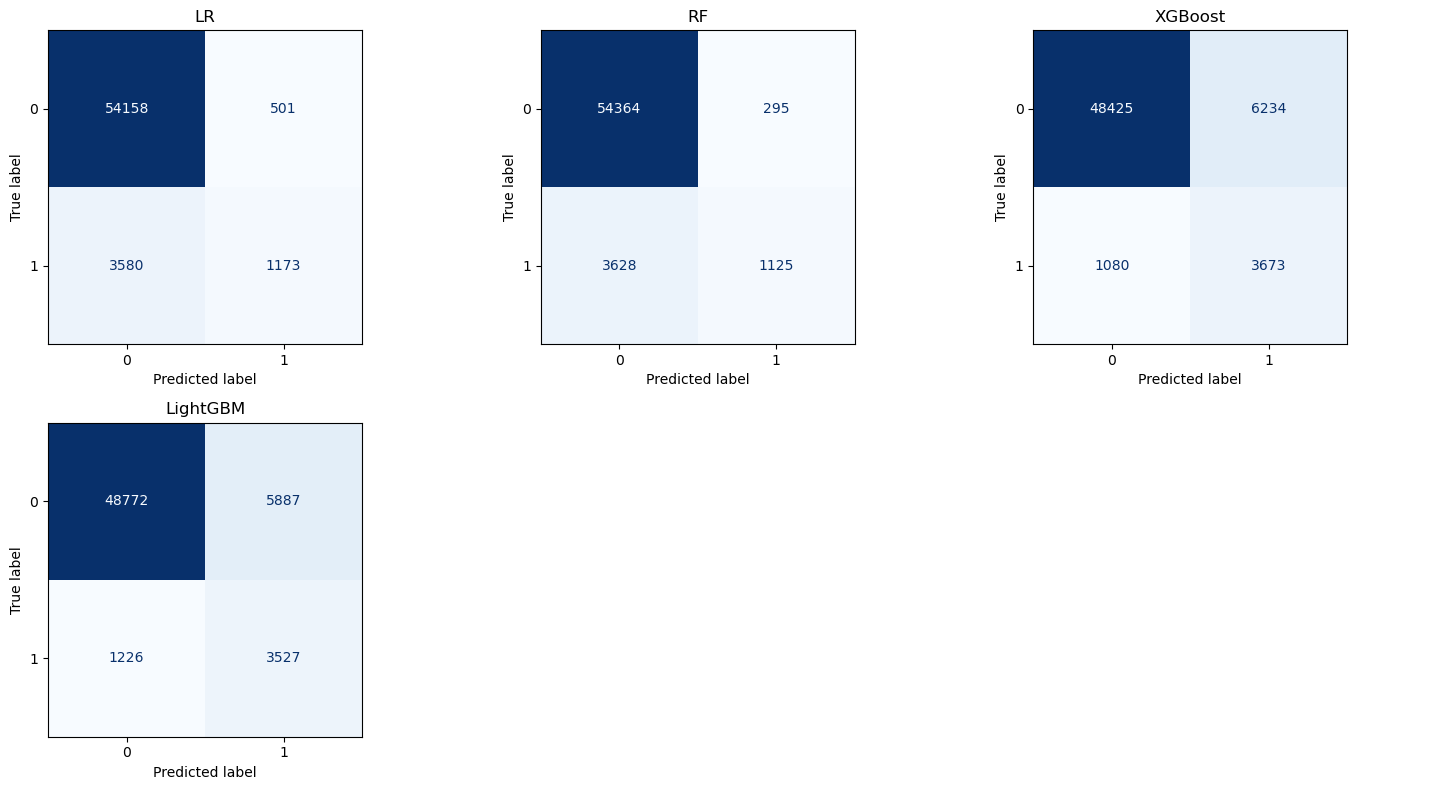

In [9]:
# Confusion Matrix 서브플롯 (환자 단위 집계 기준)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math
import numpy as np

n_models = len(pred_scores)
n_cols = 3
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = np.array(axes).reshape(-1)

for ax, (name, scores) in zip(axes, pred_scores.items()):
    y_pred = (scores >= 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"{name}")

for ax in axes[n_models:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [10]:
from __future__ import annotations

import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

def evaluate_row_level(
    pred_scores: dict[str, np.ndarray | pd.Series],
    y_true: np.ndarray | pd.Series,
    threshold: float = 0.5,
) -> pd.DataFrame:

    y_true = np.asarray(y_true).astype(int)

    results = []
    for name, scores in pred_scores.items():
        y_score = np.asarray(scores).astype(float)
        y_pred = (y_score >= threshold).astype(int)

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        if np.unique(y_true).size < 2:
            auc = np.nan
            ap = np.nan
        else:
            auc = roc_auc_score(y_true, y_score)
            ap = average_precision_score(y_true, y_score)

        results.append({
            "model": name,
            "N_rows": len(y_true),
            "pos_rate": float(y_true.mean()),
            "threshold": threshold,
            "ACC": acc,
            "PREC": prec,
            "REC": rec,
            "F1": f1,
            "AUC": auc,
            "PR-AUC": ap,
        })

    out = (
        pd.DataFrame(results)
        .set_index("model")
        .sort_values(["PR-AUC", "AUC"], ascending=False)
    )
    return out



metrics_df = evaluate_row_level(
    pred_scores=pred_scores,
    y_true=y_test,
    threshold=0.5
)

print(metrics_df.to_string(float_format=lambda x: f"{x:.4f}"))


          N_rows  pos_rate  threshold    ACC   PREC    REC     F1    AUC  PR-AUC
model                                                                           
XGBoost    59412    0.0800     0.5000 0.8769 0.3707 0.7728 0.5011 0.9176  0.6228
LightGBM   59412    0.0800     0.5000 0.8803 0.3747 0.7421 0.4979 0.9129  0.6214
RF         59412    0.0800     0.5000 0.9340 0.7923 0.2367 0.3645 0.9071  0.5794
LR         59412    0.0800     0.5000 0.9313 0.7007 0.2468 0.3650 0.8465  0.4722


## SHAP 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# 1. 데이터 로드 및 전처리
df = pd.read_csv("model_df_death48h_base_labeled_hosp_adult (1).csv")
cols_to_drop = ['subject_id', 'hadm_id', 'stay_id', 'hosp_deathtime', 'hours_from_intime_to_death']
X = df.drop(columns=cols_to_drop + ['death_48h'])
y = df['death_48h']

# 인코딩 (One-Hot Encoding)
X_encoded = pd.get_dummies(X, columns=['gender', 'first_careunit_grp', 'admission_type_grp'], drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# 불균형 처리를 위한 가중치 계산
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
sample_weights = np.where(y_train == 1, scale_pos_weight, 1)

# 2. 모델 학습 (3종)
models = {
    'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=5, class_weight='balanced', random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(max_iter=50, l2_regularization=0.1, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
}

print("모델 학습 중...")
models['RandomForest'].fit(X_train, y_train)
models['HistGradientBoosting'].fit(X_train, y_train, sample_weight=sample_weights)
models['LogisticRegression'].fit(X_train, y_train)

# 3. 중요도 분석 및 시각화 (Top-N)
top_n = 20
X_sample = X_test.sample(n=min(500, len(X_test)), random_state=42) # 속도를 위해 샘플링
y_sample = y_test.loc[X_sample.index]

for name, model in models.items():
    print(f"\n--- {name} 분석 중 ---")
    
    # 순열 중요도 계산 (SHAP 대체)
    result = permutation_importance(model, X_sample, y_sample, n_repeats=5, random_state=42, n_jobs=-1, scoring='roc_auc')
    importances = pd.Series(result.importances_mean, index=X_sample.columns).sort_values(ascending=False)
    
    print(f"Top {top_n} Features:")
    print(importances.head(top_n))

    # 시각화
    plt.figure(figsize=(10, 6))
    importances.head(top_n).sort_values().plot(kind="barh", color='teal')
    plt.title(f"{name} Feature Importance (Top {top_n})")
    plt.xlabel("Importance (AUC Decrease)")
    plt.tight_layout()
    plt.show()

SHAP failed for LR: can't set attribute 'feature_names_in_'
